In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import Recommenders as Recommenders
import Evaluation as Evaluation
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset from csv file
ratings_df = pd.read_csv('ratings_Electronics.csv', error_bad_lines=False)

# Define the columns
ratings_df.columns = ['user_id', 'item_id', 'score', 'timestamp']

In [4]:
# Explore the datatypes and shape of the dataset
ratings_df.info()
print ("\n ratings data shape: ",  ratings_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
user_id      object
item_id      object
score        float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB

 ratings data shape:  (7824481, 4)


In [5]:
# Visualize the data by getting the top 5 rows
ratings_df.head()

,user_id,item_id,score,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [6]:
# Checking for missing value
print ("Count of null values in each feature:\n", ratings_df.isna().sum())

Count of null values in each feature:
 user_id      0
item_id      0
score        0
timestamp    0
dtype: int64


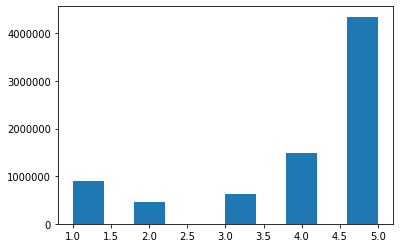

In [7]:
# Visualize the spread of ratings in the dataset
plt.hist(ratings_df.score)
plt.xlabel = 'Ratings'
plt.ylabel = 'Frequency'

amazon_elect_1.info()

In [8]:

# Get the mean ratings for each items and visualize
ratings_summary_df = pd.DataFrame()
ratings_summary_df['mean_score'] = ratings_df.groupby('item_id')['score'].mean()
ratings_summary_df.head()

,mean_score
item_id,
0321732944,5.000000
0439886341,1.666667
0511189877,4.500000
0528881469,2.851852
0558835155,3.000000


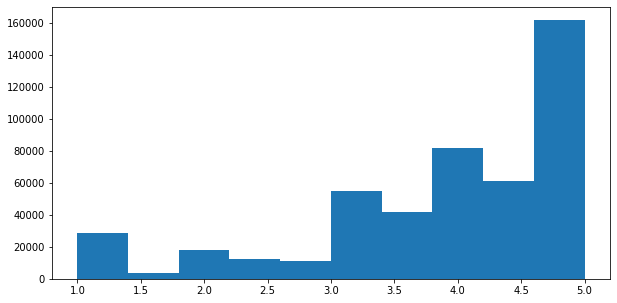

In [9]:
# Visualize the spread of ratings in the dataset
fig = plt.figure(figsize=(10 , 5))
plt.hist(ratings_summary_df.mean_score)
plt.xlabel = "Mean Ratings"
plt.ylabe = 'Frequency'
plt.show()

In [10]:
# Get the count of rating given by each users. This will help us to reduce the sparse data by 
# eliminating users who have not rated any items or less items
User_summary_df = pd.DataFrame()
User_summary_df['number_of_scores'] = ratings_df.groupby('user_id')['score'].count()
User_summary_df.head()

,number_of_scores
user_id,
A00000262KYZUE4J55XGL,1
A000063614T1OE0BUSKUT,2
A00009182QVLSWIGHLS1B,1
A00009661LC9LQPGKJ24G,1
A00010809P09NUU6ZP6H,1


In [11]:
User_summary_df['number_of_scores'].unique()

array([  1,   2,   4,   3,   6,   7,   5,   8,  10,   9,  11,  12,  21,
        14,  19,  15,  13,  18,  17,  25, 116, 132,  20,  22,  16,  26,
        27,  24,  23,  32,  68,  71,  38,  36,  35,  30,  40,  34,  65,
        39,  33,  41,  31,  28,  57,  96,  80, 107,  46, 123,  77, 130,
        52,  29,  89,  37, 112,  67,  86,  66,  45,  75, 205,  58,  50,
       216,  43,  92,  54,  49,  64,  51, 252,  42,  72,  81,  44,  74,
        47,  53,  48,  62,  70, 104, 102,  60,  63, 157,  99,  56,  55,
        61, 261, 151,  94,  78, 119,  83,  73, 144, 177, 149, 106,  82,
        69, 108, 196,  76, 221, 197, 200, 155, 208, 207, 181, 160, 213,
        59, 103,  85,  98, 145, 218,  84, 101,  91, 100,  88, 114,  79,
        93, 131, 142, 380,  90,  95, 126, 110, 105,  97, 167, 227, 128,
       127, 247, 129, 220, 121,  87, 202, 109, 156, 111, 162, 240, 125,
       137, 150, 292, 270, 115, 226, 296, 311, 176, 170, 122, 117, 159,
       277, 238, 120, 253, 138, 171, 136, 314, 282, 236, 257, 20

(0, 10000)

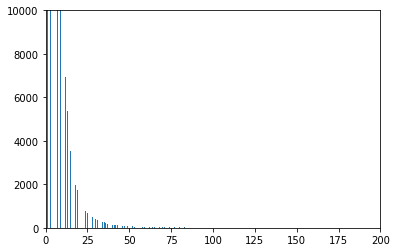

In [12]:
# Visualize the user ratings count.
plt.hist(User_summary_df.number_of_scores, bins=2000)
plt.xlabel = 'Users: No. of scores'
plt.ylabel = 'Frequency'
plt.xlim(xmin=0, xmax = 200)
plt.ylim(ymin=0, ymax = 10000)

In [13]:
# Get the count of user who have rated more than 49 ratings
print (len(User_summary_df[User_summary_df.number_of_scores >= 50]))
print (len(User_summary_df[User_summary_df.number_of_scores < 50]))

1540
4200156


In [14]:
# Get the users who have rated >= 50 items.
Users_df = User_summary_df[User_summary_df.number_of_scores >= 50]
Users_df.index

Index(['A100UD67AHFODS', 'A100WO06OQR8BQ', 'A105S56ODHGJEK', 'A105TOJ6LTVMBG',
       'A10AFVU66A79Y1', 'A10H24TDLK2VDP', 'A10NMELR4KX0J6', 'A10O7THJ2O20AG',
       'A10PEXB6XAQ5XF', 'A10X9ME6R66JDX',
       ...
       'AYOTEJ617O60K', 'AYP0YPLSP9ISM', 'AZ515FFZ7I2P7', 'AZ8XSDMIX04VJ',
       'AZAC8O310IK4E', 'AZBXKUH4AIW3X', 'AZCE11PSTCH1L', 'AZMY6E8B52L2T',
       'AZNUHQSHZHSUE', 'AZOK5STV85FBJ'],
      dtype='object', name='user_id', length=1540)

In [15]:
# Have only users who have rated >=50 for our prediction and evaluation.
ratings_subset_df = ratings_df.loc[(ratings_df['user_id'].isin(Users_df.index))]
ratings_subset_df.shape

(125871, 4)

In [16]:
# Drop the timestamp column as we will not be using in our predictions
ratings_subset_df.drop('timestamp', axis = 1, inplace = True)

C:\Users\z014413\pro\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
# Lets split the data to Train, Test
train_data, test_data = train_test_split(ratings_subset_df, test_size = 0.30, random_state=100)
print(train_data.head(5))

                user_id     item_id  score
5993537   ANW6EGY12V5XS  B007ZW43IQ    4.0
4459174  A1QVFHPY8418HC  B004T9Y0MW    5.0
2177399   ALDAF4VVLFRHP  B001NOG2T0    4.0
232286   A11YIHB6IW352W  B00007KDVI    5.0
7811982  A3PD8JD9L4WEII  B00JGSWU7S    5.0


In [18]:
# Lets have the splitted test data also in the training set without any ratings. 
# This will help us in the evaluation later.

# Get the copy of test data.
TempTest = test_data.copy()

# remove all the ratings in the test data copy.
TempTest.rating = np.nan

In [21]:
# Drop all the nan values in test data.
test_data = test_data.dropna()

# Merge the training and temp test data (without ratings)
train_data = pd.concat([train_data, TempTest])

In [29]:
# Used the seperate module recommender.py
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'item_id')

KeyError: 'score'

In [23]:
# Get the unique users in train dataset to get recommendation for users.
train_users = train_data['user_id'].unique()

In [30]:
# Get top 10 recommendation for a user.
pm.recommend(train_users[7]).head(10)

TypeError: 'NoneType' object does not support item assignment

In [27]:
import numpy as np
import pandas

#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model

    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['userId'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations
    

#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['userId', 'movieId', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pandas.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

In [28]:
#Class to calculate precision and recall


import random

class precision_recall_calculator():
    
    def __init__(self, test_data, train_data, pm, is_model):
        self.test_data = test_data
        self.train_data = train_data
        self.user_test_sample = None
        self.model1 = pm
        self.model2 = is_model
        
        self.ism_training_dict = dict()
        self.pm_training_dict = dict()
        self.test_dict = dict()
    
    #Method to return random percentage of values from a list
    def remove_percentage(self, list_a, percentage):
        k = int(len(list_a) * percentage)
        random.seed(0)
        indicies = random.sample(range(len(list_a)), k)
        new_list = [list_a[i] for i in indicies]
    
        return new_list
    
    #Create a test sample of users for use in calculating precision
    #and recall
    def create_user_test_sample(self, percentage):
        #Find users common between training and test set
        users_test_and_training = list(set(self.test_data['userId'].unique()).intersection(set(self.train_data['userId'].unique())))
        print("Length of user_test_and_training:%d" % len(users_test_and_training))

        #Take only random user_sample of users for evaluations
        self.users_test_sample = self.remove_percentage(users_test_and_training, percentage)

        print("Length of user sample:%d" % len(self.users_test_sample))
        
    #Method to generate recommendations for users in the user test sample
    def get_test_sample_recommendations(self):
        #For these test_sample users, get top 10 recommendations from training set
        #self.ism_training_dict = {}
        #self.pm_training_dict = {}

        #self.test_dict = {}

        for user_id in self.users_test_sample:
            #Get items for user_id from item similarity model
            print("Getting recommendations for user:%s" % user_id)
            user_sim_items = self.model2.recommend(user_id)
            self.ism_training_dict[user_id] = list(user_sim_items['movieId'])
    
            #Get items for user_id from popularity model
            user_sim_items = self.model1.recommend(user_id)
            self.pm_training_dict[user_id] = list(user_sim_items['movieId'])
    
            #Get items for user_id from test_data
            test_data_user = self.test_data[self.test_data['userId'] == user_id]
            self.test_dict[user_id] = set(test_data_user['movieId'].unique() )
    
    #Method to calculate the precision and recall measures
    def calculate_precision_recall(self):
        #Create cutoff list for precision and recall calculation
        cutoff_list = list(range(1,11))


        #For each distinct cutoff:
        #    1. For each distinct user, calculate precision and recall.
        #    2. Calculate average precision and recall.

        ism_avg_precision_list = []
        ism_avg_recall_list = []
        pm_avg_precision_list = []
        pm_avg_recall_list = []


        num_users_sample = len(self.users_test_sample)
        for N in cutoff_list:
            ism_sum_precision = 0
            ism_sum_recall = 0
            pm_sum_precision = 0
            pm_sum_recall = 0
            ism_avg_precision = 0
            ism_avg_recall = 0
            pm_avg_precision = 0
            pm_avg_recall = 0

            for user_id in self.users_test_sample:
                ism_hitset = self.test_dict[user_id].intersection(set(self.ism_training_dict[user_id][0:N]))
                pm_hitset = self.test_dict[user_id].intersection(set(self.pm_training_dict[user_id][0:N]))
                testset = self.test_dict[user_id]
        
                pm_sum_precision += float(len(pm_hitset))/float(N)
                pm_sum_recall += float(len(pm_hitset))/float(len(testset))

                ism_sum_precision += float(len(ism_hitset))/float(len(testset))
                ism_sum_recall += float(len(ism_hitset))/float(N)
        
            pm_avg_precision = pm_sum_precision/float(num_users_sample)
            pm_avg_recall = pm_sum_recall/float(num_users_sample)
    
            ism_avg_precision = ism_sum_precision/float(num_users_sample)
            ism_avg_recall = ism_sum_recall/float(num_users_sample)

            ism_avg_precision_list.append(ism_avg_precision)
            ism_avg_recall_list.append(ism_avg_recall)
    
            pm_avg_precision_list.append(pm_avg_precision)
            pm_avg_recall_list.append(pm_avg_recall)
            
        return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)
     

    #A wrapper method to calculate all the evaluation measures
    def calculate_measures(self, percentage):
        #Create a test sample of users
        self.create_user_test_sample(percentage)
        
        #Generate recommendations for the test sample users
        self.get_test_sample_recommendations()
        
        #Calculate precision and recall at different cutoff values
        #for popularity mode (pm) as well as item similarity model (ism)
        
        return self.calculate_precision_recall()
        #return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)    


In [31]:
# Get top 10 recommendation for a user.
pm.recommend(train_users[234]).head(10)

TypeError: 'NoneType' object does not support item assignment

In [32]:
# Funtion to get mean RMSE for the Popularity Recommender model for random 10 users in test data.
def GetpmRMSE():
    uuid = test_data['user_id'].unique()
    rand_uuid = random.sample(list(uuid), 10)
    arr_RMSE = []
    RMSE = -1
    for ruid in rand_uuid:
        #print (ruid)
        UserPred = pm.recommend(ruid)
        #print ("UIID: " + str(len(UserPred)))
        Actual = test_data[test_data.user_id == ruid]
        UserPred = UserPred[UserPred['item_id'].isin(Actual['item_id'].unique())]
        Actual = Actual[Actual['item_id'].isin(UserPred['item_id'].unique())]
        uiid = Actual['item_id'].unique()
        #print ("UIID: " + str(len(uiid)))
        if len(uiid) > 0:
            arr_Actual = []
            arr_Pred = []
            score = 0
            error = 0
            for uid in uiid:
                score = Actual[Actual.item_id == uid]['score']
                arr_Actual.append(score.values[0])
                score = UserPred[UserPred.item_id == uid]['score']
                arr_Pred.append(score.values[0])
                error = sqrt(mean_squared_error(arr_Actual, arr_Pred))
                arr_RMSE.append(error)
                #print (error)
    RMSE = np.average(arr_RMSE)
    return RMSE

In [33]:

# Import all the necessary surprise toolkit modules...

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

ModuleNotFoundError: No module named 'surprise'

In [ ]:
!pip install surprise

In [ ]:
# Lets load the dataset as per the requirement for surprise module
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(ratings_subset_df, reader = reader)

In [ ]:
# Lets split the train and test with surprise model functionality
trainset, testset = train_test_split(data, test_size=.3)

In [ ]:
# Lets go with KNN algorithm
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})

# Train the model with train dataset
algo.fit(data.build_full_trainset())

In [ ]:
# This function gives the top N predictions for the users based on collaborative filtering model.
def predictItem(uid, N=10):
    #Get the list of item id's already rated by the user.
    iidUsr = ratings_subset_df.loc[ratings_subset_df['user_id'] == uid, 'item_id']
    #Remove the item id's already rated by the user
    iids_to_pred = np.setdiff1d(itemIDs,iidUsr)
    testpredict = [[uid, iid, 4.] for iid in iids_to_pred]
    pred = algo.test(testpredict)
    pred_df = pd.DataFrame(pred)
    SortedPred = pd.DataFrame()
    SortedPred['iid'] = pred_df['iid']
    SortedPred['est'] = pred_df['est']
    SortedPred.sort_values(by = 'est', inplace= True, ascending=False)
    print ("Top {} item predictions for the user {}:".format(N, uid) )
    print (SortedPred.head(N))

In [ ]:
#Lets predict top 5 recommendation for some user
predictItem('A2OT3PDH1AWLTG', 10)

In [ ]:
predictItem(train_users[100], 10)

In [ ]:
#To get the item specific rating for a user
algo.predict('A2NYOY6H42SORF', 'B003XIM3QK', r_ui=4, verbose=True)

In [ ]:
# Get all unique item id's in the dataset
itemIDs = ratings_subset_df['item_id'].unique()

In [ ]:
# Evaluation for Popularity Model.

# This function will get the predictions for 10 random users in test dataset and will calculate the RMSE.
print("Popularity Model RMSE: ", GetpmRMSE())

In [ ]:
# Evaluation for Collaborative Filtering Model.

# Lets predict for test data and get the RMSE for the prediction.
predictions = algo.test(testset)                                           
print ("Collaborative Model RMSE: ", accuracy.rmse(predictions))

In [ ]:
# Get unique users in the dataset.
Users = ratings_subset_df['user_id'].unique()

In [ ]:
# Top 5 recommendation using Popularity Model
pm.recommend(Users[115]).head(5)

In [ ]:
# Top 5 recommendation using Collaborative Filtering Model
predictItem(Users[115], 5)

# 8. Summarize your insights.
Popularity Model gives similar recommendation to all users.
It is based on popularity of the items rather than user specific.
Collaborative Model gives user specific recommendations as it considers user/item characteristics to recommend similar products.
So Collaborative Filtering model will give precise recommendation than Popularity Model. It was evident with the RMSE scores of each models.